In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut

variables for the data set - 

erythema, scaling, definite borders, itching, koebner phenomenon,polygonal papules, follicular papules, oral mucosal involvement, knee and elbow involvement, scalp involvement,family history (0 or 1), melanin incontinence, eosinophils in the infiltrate, PNL infiltrate, fibrosis of the papillary dermis, exocytosis, acanthosis, hyperkeratosis,parakeratosis, clubbing of the rete ridges, elongation of the rete ridges, thinning of the suprapapillary epidermis, spongiform pustule, munro microabcess, focal hypergranulosis,disappearance of the granular layer, vacuolisation and damage of basal layer, spongiosis, saw-tooth appearance of retes, follicular horn plug, perifollicular parakeratosis,inflammatory monoluclear inflitrate, band-like infiltrate, Age (linear), disease (1 = psoriasis, 2 = seboreic dermatitis, 3 =  lichen planus, 4 = pityriasis rosea, 5 = cronic dermatitis, 6 = pityriasis rubra pilaris )]

In [2]:
variables = ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon','polygonal papules',
             'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement',
             'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 
             'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis','parakeratosis',
             'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis',
             'spongiform pustule', 'munro microabcess', 'focal hypergranulosis','disappearance of the granular layer',
             'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes',
             'follicular horn plug', 'perifollicular parakeratosis','inflammatory monoluclear inflitrate',
             'band-like infiltrate', 'Age', 'Disease (Output)']

In [3]:
matrix =[[2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2],
[3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1],
[2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3],
[2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1],
[2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3],
[2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41,2],
[2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18,5],
[2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57,3],
[2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22,4],
[2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30,4],
[3,3,2,1,1,0,0,0,2,2,1,0,0,0,0,0,3,2,3,2,2,2,1,1,0,0,0,0,0,0,0,1,0,20,1],
[2,2,0,3,0,0,0,0,0,0,0,0,0,2,0,2,2,0,0,0,0,0,1,0,0,0,0,3,0,0,0,1,0,21,2],
[3,3,1,2,0,0,0,0,0,1,0,0,0,2,0,3,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,22,2],
[2,3,3,0,0,0,0,0,1,1,1,0,0,1,0,0,2,1,2,1,2,3,0,2,0,0,0,0,0,0,0,2,0,10,1],
[2,2,3,3,0,3,0,2,0,0,0,2,0,0,0,1,1,1,1,0,0,0,0,0,2,0,3,0,3,0,0,1,3,65,3],
[1,1,0,1,3,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,40,4],
[2,2,1,3,0,0,0,0,0,0,0,0,0,2,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30,2],
[3,3,3,0,0,0,0,0,3,3,1,0,0,2,0,0,2,0,2,3,3,3,2,3,0,3,0,0,0,0,0,2,0,38,1],
[2,1,3,3,3,3,0,0,2,0,0,3,0,0,0,3,2,0,1,0,0,0,0,0,3,0,2,0,3,0,0,2,3,23,3],
[1,1,0,3,0,0,0,0,0,0,0,0,0,0,3,0,3,2,2,0,3,0,0,0,0,0,0,1,0,0,0,2,0,17,5],
[2,1,1,2,0,0,3,0,1,2,0,0,0,1,0,0,1,2,2,0,1,0,1,0,0,0,0,0,0,1,2,1,0,8,6],
[3,2,2,0,0,0,0,0,0,0,0,0,0,2,0,2,2,1,2,0,2,1,2,0,0,0,0,3,0,0,0,2,0,51,2],
[2,2,0,2,0,0,0,0,0,0,0,0,0,0,1,1,3,1,2,0,2,1,0,0,0,0,0,1,0,1,0,2,0,42,5],
[2,2,2,3,2,2,0,2,0,0,0,3,2,0,0,0,2,1,1,0,0,0,0,0,3,0,3,0,2,0,0,2,3,44,3],
[2,0,0,3,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,2,0,22,5],
[2,1,1,0,1,0,0,0,2,0,0,0,0,0,0,0,2,2,2,2,2,2,1,2,0,2,0,0,0,0,0,2,0,33,1],
[1,1,0,1,0,0,3,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,2,2,1,0,10,6],
[1,2,2,3,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,0,3,0,0,0,0,0,0,1,0,0,0,3,0,17,5],
[3,2,2,2,0,0,0,0,0,0,0,0,0,2,0,3,3,3,2,0,0,0,0,0,0,0,0,2,0,1,1,2,0,43,2],
[1,1,2,3,2,2,0,3,0,0,0,2,0,0,0,2,2,1,2,0,0,0,0,0,3,0,3,0,3,1,0,2,3,50,3],
[3,2,1,2,0,0,0,0,1,2,0,0,0,1,0,0,2,0,3,2,2,2,1,2,0,2,0,0,0,0,0,1,0,50,1],
[3,2,0,2,0,0,0,0,0,0,0,0,1,2,0,2,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,10,2],
[2,3,3,3,3,0,0,0,3,3,0,0,0,0,0,0,3,2,2,3,3,3,1,3,0,0,0,0,0,0,0,1,0,34,1],
[2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,np.nan,1],
[2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,np.nan,4],
[2,2,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,np.nan,2],
[2,1,2,3,2,3,0,2,0,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,1,0,2,0,2,0,0,0,3,np.nan,3],
[2,1,1,1,0,0,0,0,0,0,0,0,0,1,0,3,2,1,0,0,0,0,2,0,0,0,0,2,0,0,0,1,0,15,2],
[2,1,2,3,2,1,0,2,0,0,0,0,0,0,0,2,2,2,1,0,0,0,0,0,2,0,1,0,3,0,0,2,3,26,3],
[3,3,2,0,0,0,0,0,2,2,1,0,0,1,0,0,2,2,3,2,2,1,0,2,0,0,0,0,0,0,0,1,0,46,1],
[1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,2,1,1,1,0,0,0,0,0,0,0,0,3,0,0,0,1,0,51,2],
[1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,62,4],
[3,2,1,1,0,0,0,0,2,1,0,0,0,0,0,0,2,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,15,1],
[2,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,35,2],
[0,1,0,3,0,0,0,0,0,0,0,0,0,0,2,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30,5],
[2,1,1,1,1,2,0,1,0,0,0,2,0,0,0,3,2,1,1,0,0,0,0,0,2,0,2,0,2,0,0,3,3,48,3],
[2,1,1,3,3,0,0,0,0,0,0,0,0,0,0,2,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,46,4],
[2,1,1,1,0,0,2,0,3,2,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,12,6],
[1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,2,52,2],
[2,0,1,0,0,2,0,1,0,0,0,3,0,0,0,2,2,2,2,0,0,0,0,0,1,0,3,0,2,0,0,2,2,60,3],
[3,1,1,2,2,2,0,0,0,0,0,2,0,0,0,2,1,0,1,0,0,0,0,0,1,0,2,0,3,0,0,2,3,32,3],
[1,1,1,0,2,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,35,4],
[2,2,1,0,0,0,0,0,2,2,0,0,0,1,0,0,2,1,1,1,2,2,1,2,0,0,0,0,0,0,0,1,0,41,1],
[3,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,2,2,2,3,0,3,0,0,0,0,0,0,0,2,0,48,1],
[0,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,51,5],
[2,2,2,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,2,1,3,2,0,1,0,0,0,0,0,0,0,1,0,19,1],
[1,1,1,2,0,0,0,0,0,0,0,0,1,1,0,3,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22,2],
[2,1,1,3,0,3,0,1,0,0,0,1,0,0,0,2,2,0,1,0,0,0,0,0,1,0,3,0,1,0,0,2,2,29,3],
[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,25,4],
[3,3,0,3,0,0,0,0,0,0,0,0,1,1,0,3,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,33,2],
[2,2,1,1,0,0,1,0,1,1,1,0,0,0,0,1,2,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,8,6],
[2,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0,2,2,2,2,2,2,0,1,0,1,0,0,0,0,0,1,0,40,1],
[1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,1,3,0,2,0,2,0,0,0,0,0,0,0,0,0,0,1,0,33,5],
[3,3,2,1,1,0,0,0,2,2,1,0,0,0,0,0,3,2,3,2,2,2,1,1,0,0,0,0,0,0,0,1,0,42,1],
[2,2,0,3,0,0,0,0,0,0,0,0,0,2,0,3,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,36,2],
[3,2,2,2,0,2,0,1,0,0,0,2,0,0,0,1,1,1,1,0,0,0,0,0,2,0,2,0,2,0,0,1,3,60,3],
[2,2,2,0,0,0,0,0,2,2,0,0,0,1,0,0,2,0,2,3,3,3,1,3,0,3,0,0,0,0,0,3,0,36,1],
[1,1,0,1,3,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,21,4],
[3,3,3,2,0,0,0,0,0,0,0,0,0,0,3,2,2,2,2,0,2,0,0,0,0,0,0,0,0,0,0,3,0,40,5],
[3,3,3,0,1,0,0,0,2,0,0,0,0,0,0,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,2,0,21,1],
[2,2,2,1,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,34,2],
[2,1,2,0,0,0,3,0,3,0,0,0,0,0,0,2,2,1,2,0,0,0,0,0,0,0,0,0,0,3,3,0,0,13,6],
[1,1,1,1,1,0,0,1,0,0,0,2,0,0,0,3,1,0,1,0,0,0,0,0,2,0,2,0,2,0,0,2,3,52,3],
[1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,2,0,48,5],
[2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,17,4],
[3,2,1,2,0,0,0,0,0,0,0,0,0,2,0,2,1,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,25,2],
[2,2,2,1,0,0,0,0,0,0,0,0,0,2,0,1,2,0,3,0,0,0,0,0,0,0,0,3,0,0,0,0,0,33,2],
[2,1,2,2,2,0,0,0,0,0,0,0,1,2,0,2,2,2,2,2,2,1,1,1,0,0,0,0,0,0,0,3,0,62,1],
[0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,3,1,1,1,0,0,0,0,0,2,0,3,3,3,0,0,3,3,52,3],
[2,2,1,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,27,5],
[3,2,2,2,2,0,0,0,0,0,0,0,0,1,0,0,2,1,1,1,2,1,1,1,0,0,0,0,0,0,0,2,0,40,1],
[3,2,2,2,0,0,0,0,0,0,0,0,0,3,0,2,2,0,3,0,0,0,0,0,0,0,0,2,0,0,0,1,0,31,2],
[2,1,1,2,0,0,0,0,0,0,0,0,0,2,0,3,2,0,2,0,0,0,0,0,0,0,0,3,0,0,0,3,0,27,2],
[3,2,2,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,10,2],
[1,1,2,3,0,0,0,0,0,0,0,0,0,0,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,55,5],
[2,2,2,3,3,0,0,0,0,2,0,0,1,2,0,1,1,1,1,1,1,1,1,2,0,0,0,0,0,0,0,2,0,30,1],
[3,3,2,2,1,0,0,0,0,1,0,0,2,2,0,1,2,1,1,1,2,1,2,1,0,0,0,0,0,0,0,2,0,42,1],
[2,1,2,1,1,0,0,2,0,0,0,2,0,0,0,2,2,0,2,0,0,0,0,0,3,0,3,0,3,0,0,3,3,48,3],
[0,1,2,1,1,0,1,0,2,3,0,0,0,1,0,0,3,1,2,3,3,3,1,1,0,0,0,0,0,0,0,2,0,22,1],
[1,1,1,0,2,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,31,4],
[3,2,1,3,0,0,0,0,0,0,1,0,1,2,0,3,2,0,1,0,1,0,0,0,0,0,0,3,0,0,0,1,0,50,2],
[2,1,0,2,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,43,2],
[1,1,1,3,0,0,1,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,0,0,0,0,0,1,0,0,0,2,0,30,5],
[3,3,3,3,3,0,0,0,3,3,1,0,0,1,0,0,2,1,2,2,2,2,2,2,0,1,0,0,0,0,0,2,0,42,1],
[2,1,1,3,2,2,0,2,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,2,0,3,0,2,0,0,3,3,22,3],
[2,1,0,2,2,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,0,0,0,0,1,0,2,0,0,0,1,0,18,4],
[2,2,1,2,0,0,0,0,0,0,0,0,0,1,0,3,2,0,1,0,0,0,0,0,0,0,0,3,0,0,0,2,0,35,2],
[1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,60,5],
[2,2,2,2,2,0,0,0,2,1,0,0,0,0,0,2,0,2,2,2,2,2,1,1,0,0,0,0,0,0,0,1,0,28,1],
[2,2,1,0,0,0,2,0,2,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,13,6],
[2,2,1,1,0,0,0,0,1,0,0,0,1,1,0,2,2,1,1,0,1,0,1,0,0,0,0,2,0,0,0,1,0,20,2],
[1,1,2,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,64,5],
[3,3,3,2,2,0,0,0,2,2,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,2,0,0,0,0,0,3,0,43,1],
[2,3,1,2,0,0,0,0,0,0,0,0,1,0,0,3,2,0,2,0,2,0,0,0,0,0,0,2,0,0,0,1,0,20,2],
[1,2,2,1,0,0,0,0,0,0,0,0,2,0,0,2,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,34,2],
[2,2,2,2,2,0,0,0,2,2,1,0,0,1,0,0,2,1,2,2,2,1,0,2,0,0,1,0,0,0,0,1,0,39,1],
[1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,60,4],
[1,1,1,1,1,0,0,0,1,1,0,0,0,2,0,0,1,2,1,1,1,2,0,3,0,0,0,0,0,0,0,2,0,38,1],
[2,2,3,2,1,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,2,0,3,0,2,0,0,2,3,44,3],
[3,2,1,2,2,0,0,0,2,2,0,0,0,1,0,0,2,3,2,2,2,3,0,3,0,0,0,0,0,0,0,3,1,36,1],
[2,2,2,3,2,0,0,0,3,3,0,0,0,1,0,0,2,0,2,2,2,2,2,2,0,1,0,0,0,0,0,2,0,41,1],
[2,2,2,3,2,2,0,2,0,0,0,3,0,0,0,3,2,0,1,0,0,0,0,0,2,0,3,2,3,0,0,3,3,18,3],
[1,1,2,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,39,5],
[2,2,3,2,3,3,0,3,0,0,0,2,0,0,0,2,3,0,2,0,0,0,0,0,3,0,2,2,2,0,0,2,2,40,3],
[1,1,1,2,2,2,0,2,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,2,0,2,0,2,0,0,3,3,47,3],
[2,2,2,3,0,0,1,0,0,0,0,0,0,0,3,1,2,2,2,0,2,0,0,0,0,0,0,0,0,0,0,1,0,16,5],
[2,2,1,2,0,0,0,0,0,0,0,0,0,1,0,2,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,27,2],
[2,2,3,2,2,2,0,3,0,0,0,2,0,0,2,2,2,0,1,0,0,0,0,0,2,0,3,3,2,0,0,2,2,52,3],
[2,2,0,2,2,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,2,0,25,4],
[1,1,1,1,1,0,0,0,2,2,0,0,0,2,0,0,2,1,1,2,2,1,0,2,0,0,0,0,0,0,0,0,2,0,1],
[3,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,1,0,0,0,0,0,0,3,0,0,0,2,0,33,2],
[2,2,2,1,0,0,2,0,0,0,0,0,0,0,3,1,3,2,2,0,2,0,0,0,0,0,0,0,0,0,0,2,0,46,5],
[1,1,2,0,0,0,3,0,3,0,1,0,0,0,0,2,1,1,1,1,0,0,0,0,0,0,0,0,0,2,2,2,0,7,6],
[2,3,3,3,3,0,0,0,2,1,0,0,0,0,0,2,2,1,3,3,3,3,0,0,0,0,0,0,0,0,0,2,0,30,1],
[3,2,2,2,2,0,0,0,0,3,0,0,0,2,0,0,3,1,3,3,3,2,0,1,0,0,0,0,0,0,0,2,0,29,1],
[2,2,1,1,0,0,0,0,0,0,0,0,0,1,0,2,3,0,2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,23,2],
[2,2,2,0,0,0,2,0,2,0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,2,2,2,0,8,6],
[2,2,2,2,3,2,0,3,0,0,0,3,0,0,0,3,2,0,1,0,0,0,0,0,2,0,3,0,3,0,0,3,3,44,3],
[1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,17,5],
[2,1,0,2,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,16,4],
[1,1,2,2,2,0,2,0,1,2,0,0,0,1,0,0,2,1,2,3,3,3,2,2,0,0,0,0,0,0,0,2,0,55,1],
[2,2,2,3,2,0,0,0,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,2,0,0,0,0,0,3,0,40,1],
[3,2,2,1,3,3,0,3,0,0,0,3,0,0,0,3,2,0,3,0,0,0,0,0,2,0,3,3,3,0,0,2,2,34,3],
[2,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,29,5],
[3,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,34,5],
[1,1,1,1,1,0,1,0,2,3,0,0,0,1,0,0,2,2,1,2,2,2,2,2,0,0,0,0,0,0,0,3,0,25,1],
[2,2,0,2,1,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,3,0,70,4],
[3,3,2,1,0,0,0,0,0,0,0,0,2,0,0,2,3,0,2,0,2,0,0,0,0,0,0,2,0,0,0,1,0,37,2],
[2,3,2,3,3,3,0,2,0,0,0,3,0,0,0,3,2,0,3,0,0,0,0,0,3,0,2,2,2,0,0,2,2,41,3],
[3,3,3,3,2,0,0,0,0,0,0,0,0,1,0,0,2,1,1,1,2,1,1,2,0,0,0,0,0,0,0,2,0,32,1],
[2,2,1,2,2,0,0,0,0,0,0,0,0,1,0,1,2,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,20,2],
[2,3,1,2,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,2,1,2,2,0,0,0,0,0,0,0,0,2,0,19,1],
[3,2,2,3,2,0,0,0,0,2,0,0,0,2,0,2,2,1,2,3,3,3,3,1,0,0,0,0,0,0,0,3,0,61,1],
[2,1,1,3,2,2,0,2,0,0,0,0,0,0,2,3,0,2,0,0,0,0,0,3,0,2,0,2,2,0,0,3,2,27,3],
[1,1,2,3,2,3,0,3,0,0,0,2,0,0,0,2,2,0,2,0,0,0,0,0,2,0,3,2,3,0,0,2,3,36,3],
[2,2,3,3,1,2,0,2,0,0,0,1,0,0,0,3,3,0,2,0,0,0,0,0,3,0,2,1,2,0,0,2,3,40,3],
[3,2,0,3,0,0,0,0,0,0,0,0,1,1,0,3,2,0,1,0,0,0,0,0,0,0,0,3,0,0,0,2,0,52,2],
[1,1,0,3,0,0,0,0,0,0,0,0,1,0,2,0,3,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,27,5],
[2,2,2,0,2,0,0,0,0,0,0,0,0,0,0,2,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,30,4],
[2,3,0,2,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,45,2],
[1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,34,2],
[2,3,2,1,0,0,0,0,1,2,1,0,0,1,0,2,1,0,1,2,2,1,1,0,0,0,0,0,0,0,0,2,0,27,1],
[3,3,2,2,0,0,0,0,2,0,0,0,0,1,0,2,1,0,2,1,1,1,1,0,0,0,0,0,0,0,0,2,0,46,1],
[2,2,2,0,0,0,0,0,1,0,0,0,0,2,0,1,3,0,1,2,2,1,0,0,0,0,0,0,0,0,0,1,0,52,1],
[1,0,1,2,0,0,0,0,0,0,0,0,0,0,3,0,3,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,28,5],
[2,1,1,1,0,2,0,2,0,0,0,2,0,0,0,2,2,0,2,0,0,0,0,0,1,0,2,2,2,0,0,3,3,40,3],
[2,3,0,2,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,55,2],
[3,3,2,2,0,3,0,2,0,0,0,2,0,0,0,2,2,0,2,0,0,0,0,0,2,0,2,3,3,0,0,2,3,32,3],
[2,2,1,2,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,33,2],
[3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,47,2],
[2,1,2,0,2,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,35,4],
[2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,61,2],
[3,2,2,2,0,2,0,2,0,0,0,2,0,0,0,2,2,0,2,0,0,0,0,0,2,0,1,1,1,0,0,2,2,22,3],
[2,2,0,0,0,0,2,0,1,1,1,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,1,0,1,2,1,0,10,6],
[3,2,0,2,0,0,0,0,0,0,0,0,0,1,0,2,2,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,20,2],
[3,2,2,3,1,0,0,0,1,1,1,0,0,2,0,0,2,0,2,2,3,2,1,1,0,0,0,0,0,0,0,1,0,55,1],
[2,3,2,2,1,0,0,0,2,2,0,0,0,2,0,0,2,0,3,3,3,2,2,2,0,0,0,0,0,0,0,2,0,67,1],
[2,2,3,3,1,2,0,2,0,0,0,2,0,0,0,3,2,0,2,0,0,0,0,0,2,0,2,0,0,0,0,2,3,51,3],
[2,2,2,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,0,2,0,0,0,1,0,20,4],
[2,2,3,3,1,3,0,2,0,0,0,3,0,0,0,2,3,0,2,0,0,0,0,0,2,0,3,2,2,0,0,3,3,22,3],
[1,1,2,3,1,2,0,2,0,0,0,1,0,0,0,1,3,0,1,0,0,0,0,0,1,0,2,2,3,0,0,2,3,45,3],
[2,3,2,0,0,0,0,0,2,2,0,0,0,2,0,0,2,0,2,3,2,1,3,0,0,2,0,0,0,0,0,2,0,55,1],
[3,2,3,0,0,0,0,0,3,0,0,0,0,3,0,0,1,0,1,2,2,0,2,0,0,3,0,0,0,0,0,1,0,56,1],
[3,3,3,0,0,0,0,0,2,0,0,0,0,2,0,0,2,0,2,2,3,0,3,0,0,2,0,0,0,0,0,2,0,18,1],
[3,2,2,2,0,2,0,2,0,0,0,2,0,0,0,2,3,0,3,0,0,0,0,0,2,0,2,3,2,0,0,2,3,40,3],
[2,2,2,0,0,0,0,0,3,2,0,0,0,2,0,0,2,0,2,2,3,2,3,0,0,2,0,0,0,0,0,3,0,30,1],
[3,2,3,0,0,0,0,0,2,2,0,0,0,2,0,0,3,0,2,2,2,3,3,0,0,2,0,0,0,0,0,2,0,33,1],
[2,2,0,3,0,0,0,0,0,0,0,0,0,2,0,3,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,40,2],
[1,2,2,2,0,3,0,2,0,0,0,2,0,0,0,3,2,0,2,0,0,0,0,0,3,0,2,2,2,0,0,2,2,42,3],
[2,2,2,2,0,2,0,3,0,0,0,3,0,0,0,3,3,0,3,0,0,0,0,0,3,0,3,3,3,0,0,2,2,36,3],
[2,3,2,0,0,0,0,0,2,0,0,0,0,3,0,0,3,0,2,2,2,0,2,0,0,0,0,0,0,0,0,2,0,27,1],
[3,2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,1,0,2,2,0,0,0,0,0,0,0,0,0,2,0,56,1],
[1,3,1,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,2,0,3,3,0,0,0,0,0,0,0,0,0,3,0,60,1],
[2,2,2,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,3,0,3,3,0,0,0,0,0,0,0,0,0,2,0,20,1],
[2,2,1,0,0,0,3,0,2,0,1,0,0,0,0,2,2,1,2,0,0,0,0,0,0,0,0,2,0,3,3,2,0,7,6],
[2,2,0,2,0,0,0,0,0,0,0,0,0,1,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,30,2],
[3,2,0,3,0,0,0,0,0,0,0,0,0,2,0,2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,19,2],
[2,3,0,2,0,0,0,0,0,0,0,0,0,2,0,3,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,52,2],
[3,2,0,2,0,0,0,0,0,0,1,0,0,2,0,2,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,55,2],
[2,2,2,0,0,0,0,0,3,0,0,0,0,2,0,0,2,0,2,2,2,0,2,0,0,2,0,0,0,0,0,2,0,23,1],
[2,1,2,3,1,2,0,2,0,0,0,2,0,0,0,1,3,0,2,0,0,0,0,0,2,0,2,0,3,0,0,3,2,50,3],
[2,3,3,3,0,3,0,3,0,0,0,2,0,0,0,2,1,0,2,0,0,0,0,0,2,0,2,0,3,0,0,2,2,38,3],
[3,2,2,2,0,2,0,0,0,0,0,2,0,0,0,3,2,0,3,0,0,0,0,0,2,0,3,0,2,0,0,3,3,25,3],
[2,2,2,0,0,0,0,0,2,2,1,0,0,2,0,0,2,0,3,3,2,2,2,1,0,2,0,0,0,0,0,2,0,18,1],
[3,2,2,0,0,0,0,0,3,3,1,0,0,3,0,0,3,0,2,3,2,3,2,0,0,3,0,0,0,0,0,2,0,35,1],
[2,2,1,2,0,0,0,0,0,0,0,0,1,1,0,2,2,0,1,0,0,0,1,0,0,0,0,3,0,0,0,2,0,22,2],
[3,2,3,3,1,2,0,2,0,0,0,3,0,0,0,2,2,0,2,0,0,0,0,0,1,0,2,0,2,0,0,2,3,52,3],
[3,2,2,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,2,0,0,0,1,0,0,0,0,2,0,0,0,2,0,50,2],
[2,2,2,0,0,0,0,0,0,0,0,0,1,2,0,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,33,2],
[3,2,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,44,2],
[1,1,0,2,0,0,1,0,0,0,0,0,0,0,2,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,18,5],
[1,1,0,1,0,0,2,0,0,0,0,0,0,0,1,2,1,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,25,5],
[2,2,0,2,0,0,1,0,0,0,0,0,0,0,2,1,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,52,5],
[1,1,0,1,0,0,2,0,0,0,0,0,0,0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,35,5],
[2,2,0,2,0,0,1,0,0,0,0,0,0,0,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,40,5],
[3,2,2,0,0,0,0,0,2,2,1,0,0,2,0,0,3,2,1,2,2,2,1,1,0,0,0,0,0,0,0,2,0,55,1],
[2,3,2,0,1,0,0,0,2,3,0,0,0,2,0,0,2,3,1,2,2,2,1,1,0,0,0,0,0,0,0,1,0,20,1],
[3,2,2,0,2,0,0,0,3,2,0,0,0,3,0,0,3,2,2,2,2,2,1,0,0,0,0,0,0,0,0,2,0,60,1],
[2,3,2,0,0,0,0,0,2,3,0,0,0,2,0,0,2,2,2,2,2,3,2,1,0,0,0,0,0,0,0,2,0,33,1],
[2,3,2,0,0,0,0,0,3,2,0,0,0,2,0,0,3,2,3,2,2,3,2,1,0,0,0,0,0,0,0,2,0,27,1],
[3,2,2,0,0,0,0,0,2,2,0,0,0,2,0,0,3,1,2,3,3,2,3,0,0,0,0,0,0,0,0,2,0,50,1],
[2,3,2,0,0,0,0,0,3,2,0,0,0,2,0,0,2,1,2,3,3,2,2,0,0,0,0,0,0,0,0,1,0,70,1],
[2,2,2,3,1,2,0,2,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,2,2,2,1,3,0,0,2,3,28,3],
[2,2,2,2,1,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,2,2,2,2,0,0,3,3,30,3],
[3,2,3,2,2,2,0,2,0,0,0,3,0,0,0,2,3,0,1,0,0,0,0,0,2,1,2,2,1,0,0,2,3,53,3],
[2,3,2,3,3,2,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,2,2,1,2,0,0,2,2,27,3],
[2,2,3,2,2,2,0,3,0,0,0,3,0,0,0,2,3,0,0,0,0,0,0,0,2,2,3,2,2,0,0,2,3,50,3],
[3,2,2,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,2,2,2,2,2,0,0,2,2,42,3],
[3,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,45,4],
[2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,35,4],
[3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,30,4],
[2,2,2,1,2,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,42,4],
[1,1,1,3,0,0,0,0,0,0,0,0,0,0,2,1,3,0,1,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18,5],
[2,1,2,2,0,0,0,0,0,0,0,0,0,0,3,0,3,0,2,0,2,0,0,0,0,0,0,2,0,0,0,1,0,25,5],
[2,1,3,3,0,0,0,0,0,0,0,0,0,0,2,0,2,0,2,0,2,0,0,0,0,0,0,1,0,0,0,1,0,36,5],
[2,1,2,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,40,5],
[1,2,1,1,0,0,0,0,0,0,0,0,0,0,2,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,0,2,0,35,5],
[1,1,1,2,0,0,0,0,0,0,0,0,0,0,3,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,0,2,0,19,5],
[2,1,2,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,0,1,0,50,5],
[2,2,0,2,0,0,0,0,0,0,0,0,1,1,0,2,2,0,2,0,0,0,0,0,0,0,0,3,0,0,0,2,0,47,2],
[3,2,0,1,0,0,0,0,0,1,0,0,2,2,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,3,0,30,2],
[2,3,0,3,0,0,0,0,0,2,0,0,2,2,0,2,3,0,3,0,0,0,0,0,0,0,0,2,0,0,0,2,0,42,2],
[3,2,0,2,0,0,0,0,0,2,0,0,2,2,0,2,2,0,2,0,0,0,0,0,0,0,0,1,0,0,0,2,0,55,2],
[2,2,2,1,1,0,0,0,2,0,1,0,0,2,0,1,2,1,2,2,2,2,1,1,0,1,0,0,0,0,0,2,0,60,1],
[3,2,3,0,1,0,0,0,1,2,0,0,0,2,0,2,1,2,1,1,1,1,1,1,0,2,0,0,0,0,0,2,0,65,1],
[2,2,2,1,0,0,0,0,0,1,1,0,0,1,0,2,1,2,2,2,1,2,0,0,0,1,0,0,0,0,0,2,0,47,1],
[3,2,3,2,0,0,0,0,0,2,1,0,0,0,0,2,1,3,2,2,2,2,0,0,0,3,0,0,0,0,0,3,0,35,1],
[2,2,1,1,0,0,0,0,0,2,1,0,0,0,0,2,2,2,2,1,2,2,0,0,0,2,0,0,0,0,0,2,0,52,1],
[2,2,2,2,0,0,0,0,0,1,0,0,0,0,0,2,2,3,2,2,1,1,0,0,0,2,0,0,0,0,0,1,0,60,1],
[2,2,2,1,0,0,2,0,2,2,1,0,0,0,0,1,2,0,2,0,0,0,0,0,0,0,0,2,0,2,2,2,0,7,6],
[3,2,0,0,0,0,2,0,2,2,0,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,0,1,0,2,3,3,0,8,6],
[2,2,2,3,0,0,0,0,2,2,1,0,0,1,0,0,2,1,2,3,3,3,0,1,0,2,0,0,0,0,0,1,0,25,1],
[3,2,2,3,0,0,0,0,2,0,0,0,0,2,0,0,2,2,2,2,2,2,0,2,0,2,0,0,0,0,0,1,0,60,1],
[2,2,2,2,0,0,0,0,2,2,1,0,0,1,0,0,3,0,3,2,2,2,0,2,0,2,0,0,0,0,0,2,0,50,1],
[2,1,2,0,0,0,0,0,3,2,1,0,0,2,0,0,2,0,2,3,2,2,0,2,0,3,0,0,0,0,0,2,0,33,1],
[3,3,3,0,0,0,0,0,2,3,0,0,0,1,0,0,3,0,3,3,3,3,0,1,0,3,0,0,0,0,0,3,0,27,1],
[2,2,2,0,0,0,0,0,2,3,0,0,0,2,0,0,2,0,2,3,2,2,0,2,0,2,0,0,0,0,0,2,0,55,1],
[2,2,2,0,0,0,0,0,2,2,0,0,0,2,0,0,2,0,2,2,2,2,0,2,0,2,0,0,0,0,0,2,0,62,1],
[3,2,2,0,0,0,0,0,0,1,1,0,0,2,0,0,2,0,1,1,2,2,1,0,0,2,0,0,0,0,0,2,0,19,1],
[2,1,1,2,2,2,0,2,0,0,0,2,1,0,0,3,2,1,1,0,0,0,0,0,2,0,2,2,3,0,0,2,3,50,3],
[2,2,2,2,3,3,0,2,0,0,0,2,0,0,0,2,3,1,1,0,0,0,0,0,2,0,2,3,2,0,0,3,2,40,3],
[2,2,2,2,1,2,0,2,0,0,0,2,1,0,0,3,2,1,1,0,0,0,0,0,2,0,2,2,3,0,0,2,3,62,3],
[2,2,2,2,1,2,0,2,0,0,0,3,1,0,0,2,2,1,1,0,0,0,0,0,2,0,2,3,2,0,0,2,3,36,3],
[2,1,2,2,0,3,0,2,0,0,0,2,1,0,0,3,2,1,1,0,0,0,0,0,2,0,2,3,2,0,0,3,2,27,3],
[3,1,2,3,0,3,0,0,0,1,0,2,1,0,0,2,3,1,2,0,0,0,0,0,1,0,3,2,3,0,0,2,2,47,3],
[2,1,2,2,0,2,0,0,0,1,0,1,1,0,0,2,3,1,2,0,0,0,0,0,2,0,2,2,2,0,0,2,2,50,3],
[2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,1,0,2,0,0,0,1,0,35,4],
[3,2,1,1,0,0,0,0,0,0,0,0,1,0,0,3,2,1,1,0,0,0,0,0,0,1,0,1,0,0,0,2,0,25,4],
[1,2,2,0,1,0,0,0,0,0,0,0,0,1,0,2,2,2,1,0,0,0,0,0,0,1,0,2,0,0,0,1,0,60,4],
[2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,2,2,1,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22,4],
[1,2,2,0,1,0,0,0,0,0,0,0,0,0,0,3,2,2,1,0,0,0,0,0,0,1,0,2,0,0,0,2,0,35,4],
[2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,0,0,1,0,0,0,2,0,36,4],
[2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,3,2,2,1,3,0,0,0,0,0,0,2,0,0,0,3,0,np.nan,5],
[1,1,1,3,0,0,0,0,0,0,0,0,0,0,3,2,3,1,2,2,2,0,0,0,0,0,0,3,0,0,0,2,0,np.nan,5],
[1,1,0,2,0,0,0,0,1,0,0,0,0,0,3,2,3,2,1,1,3,0,0,0,0,0,0,2,0,0,0,3,0,np.nan,5],
[1,1,0,3,0,0,0,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,1,0,0,0,0,2,0,0,0,3,0,np.nan,5],
[2,2,1,1,0,0,2,0,2,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,2,0,1,2,2,0,10,6],
[3,2,0,1,0,0,2,0,1,0,1,0,0,0,0,1,2,1,2,0,0,0,0,0,0,0,0,3,0,1,2,2,0,12,6],
[2,2,1,1,0,0,2,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,2,0,1,2,2,0,8,6],
[3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,1,0,2,0,0,0,2,0,35,4],
[2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,3,0,0,0,2,0,62,4],
[2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,3,0,48,4],
[3,3,2,0,1,0,0,0,2,2,1,0,0,0,0,0,2,1,3,3,3,2,1,0,0,1,0,0,0,0,0,2,0,30,1],
[2,2,3,1,0,0,0,0,3,2,1,0,0,0,0,1,2,0,3,3,3,2,1,1,0,2,0,0,0,0,0,3,0,57,1],
[1,2,2,1,1,0,0,0,2,2,1,0,0,1,0,0,2,0,2,3,3,3,2,1,0,2,0,0,0,0,0,2,0,62,1],
[2,2,3,1,0,0,0,0,1,2,0,0,0,1,0,0,2,0,2,3,3,2,1,1,0,2,0,0,0,0,0,2,0,36,1],
[3,2,2,2,0,0,0,0,2,1,0,0,0,1,0,0,2,0,3,2,3,2,2,1,0,2,0,0,0,0,0,3,0,18,1],
[2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,0,0,0,0,0,0,0,0,3,0,0,0,2,0,25,2],
[3,2,2,1,0,0,0,0,1,0,1,0,0,1,0,3,2,0,1,0,0,0,0,0,0,0,0,3,0,0,0,3,0,16,2],
[2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,50,4],
[1,2,2,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,55,4],
[2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,27,4],
[3,3,2,0,0,0,0,0,2,2,0,0,0,0,0,0,2,1,2,2,3,2,1,0,0,1,0,0,0,0,0,2,0,55,1],
[2,3,3,1,0,0,0,0,2,1,0,0,0,0,0,0,3,0,2,2,2,3,0,1,0,2,0,0,0,0,0,2,0,22,1],
[2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,70,2],
[3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,22,2],
[2,3,2,1,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,45,2],
[2,1,2,1,0,2,0,2,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,2,0,2,0,2,0,0,3,3,40,3],
[2,2,3,1,0,3,0,2,0,0,0,3,0,0,0,3,3,0,0,0,0,0,0,0,1,0,3,2,3,0,0,3,3,28,3],
[3,2,2,1,0,2,0,3,0,0,0,2,0,0,0,2,2,1,1,0,0,0,0,0,2,0,3,1,2,0,0,3,3,36,3],
[2,2,3,2,1,2,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,2,0,2,2,2,0,0,3,3,27,3],
[2,2,2,0,1,0,0,0,1,1,0,0,0,0,0,0,2,1,2,3,3,2,0,2,0,1,0,0,0,0,0,2,0,42,1],
[2,3,2,0,1,0,0,0,3,2,1,0,0,1,0,0,3,0,2,2,3,3,0,0,0,2,0,0,0,0,0,2,0,27,1],
[2,2,3,1,0,0,0,0,2,2,0,0,0,0,0,0,3,1,3,3,2,2,2,1,0,3,0,0,0,0,0,2,0,50,1],
[2,1,3,0,1,0,0,0,0,2,0,0,0,0,0,0,3,0,2,2,3,3,0,0,0,2,0,0,0,0,0,2,0,34,1],
[2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,8,5],
[2,1,1,3,0,0,1,0,0,0,0,0,0,0,2,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,2,0,19,5],
[1,1,2,2,0,0,0,0,1,0,0,0,1,0,3,0,3,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,36,5],
[2,1,0,3,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,70,5],
[2,2,1,3,0,0,0,0,0,0,0,0,0,0,3,0,2,1,0,0,3,0,0,0,0,0,0,0,0,0,0,2,0,52,5],
[2,2,3,3,1,2,0,1,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,1,0,2,0,2,0,0,2,3,25,3],
[3,2,2,2,0,2,0,2,0,0,0,3,0,0,0,3,2,0,1,0,0,0,0,0,1,0,2,0,3,0,0,3,3,36,3],
[2,2,2,3,1,2,0,1,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,1,0,2,0,3,0,0,1,2,50,3],
[2,1,2,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,34,4],
[3,1,2,1,0,0,0,0,2,3,0,0,0,0,0,0,2,0,2,3,2,2,0,3,0,2,0,0,0,0,0,2,0,17,1],
[2,2,2,0,1,0,0,0,2,1,0,0,0,0,0,0,3,1,1,3,2,2,0,2,0,0,0,0,0,0,0,2,0,24,1],
[2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,1,0,3,0,0,0,2,0,22,4],
[2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,1,0,3,0,0,0,2,0,55,4],
[2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,12,4],
[2,3,2,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,2,3,3,2,0,2,0,2,0,0,0,0,0,2,0,43,1],
[3,2,2,0,0,0,0,0,0,1,1,0,0,0,0,0,3,0,2,2,3,2,0,1,0,2,0,0,0,0,0,2,0,50,1],
[2,2,2,1,0,0,0,0,2,2,0,0,0,0,0,0,2,0,2,2,3,2,0,0,0,2,0,0,0,0,0,2,0,36,1],
[2,2,3,3,2,3,0,1,0,0,0,2,0,0,0,3,2,0,1,0,0,0,0,0,2,0,3,0,3,0,0,2,3,26,3],
[3,1,2,3,2,2,0,2,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,2,0,2,0,2,0,0,3,3,16,3],
[2,2,2,3,2,3,0,2,0,0,0,2,0,0,0,2,2,0,0,0,0,0,0,0,3,0,2,0,2,0,0,2,3,32,3],
[2,1,2,3,3,2,0,2,0,0,0,3,0,0,0,3,1,0,0,0,0,0,0,0,2,0,3,0,2,0,0,2,3,51,3],
[2,2,3,2,2,3,0,1,0,0,0,2,0,0,0,3,3,0,1,0,0,0,0,0,2,0,3,0,3,0,0,3,2,56,3],
[2,2,2,0,1,0,0,0,2,2,0,0,0,0,0,0,2,1,2,3,2,3,1,2,0,2,0,0,0,0,0,2,0,47,1],
[2,2,3,1,0,0,0,0,2,1,0,0,0,0,0,0,2,2,3,3,3,2,0,1,0,2,0,0,0,0,0,2,0,51,1],
[3,2,2,0,0,0,0,0,2,2,0,0,0,0,0,0,3,0,3,2,3,3,0,2,0,3,0,0,0,0,0,3,0,58,1],
[2,2,3,0,0,0,0,0,3,0,0,0,0,0,0,0,3,2,2,2,3,2,0,0,0,1,0,0,0,0,0,2,0,27,1],
[2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,2,0,32,4],
[2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,3,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,27,4],
[2,3,3,0,0,0,0,0,1,0,1,0,0,1,0,0,2,2,2,2,2,2,2,2,0,1,0,0,0,0,0,2,0,62,1],
[2,2,3,0,1,0,0,0,3,0,0,0,0,2,0,0,1,1,2,2,2,3,0,2,0,1,0,0,0,0,0,2,0,53,1],
[3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,46,4],
[2,1,2,3,2,2,0,3,0,0,0,2,1,0,0,2,2,0,1,0,0,0,0,0,2,0,2,1,2,0,0,2,3,37,3],
[1,1,2,3,2,3,0,2,0,0,0,2,0,0,0,2,1,0,2,0,0,0,0,0,2,0,2,0,2,0,0,2,3,49,3],
[2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,1,0,0,0,0,0,0,1,0,3,0,0,0,2,0,18,4],
[2,2,2,2,2,0,0,0,0,2,0,0,0,0,0,0,2,0,2,2,3,3,2,2,0,2,0,0,0,0,0,2,0,46,1],
[2,1,2,0,0,0,0,0,2,0,0,0,0,1,0,0,2,1,2,3,2,3,0,0,0,3,0,0,0,0,0,0,0,33,1],
[1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,22,4],
[2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,2,0,2,0,0,0,2,0,44,4],
[1,0,0,3,0,0,0,0,0,0,0,0,1,0,3,2,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,36,5],
[2,0,1,3,0,0,0,0,0,0,0,0,0,0,2,2,3,0,1,0,3,0,0,0,0,0,0,0,0,0,0,3,0,63,5],
[3,2,2,0,0,0,0,0,2,2,0,0,0,0,0,0,3,0,3,2,3,2,0,1,0,2,0,0,0,0,0,1,0,56,1],
[2,3,2,1,0,0,0,0,2,2,0,0,0,0,0,0,2,0,2,2,3,2,1,0,0,2,0,0,0,0,0,2,0,60,1],
[2,1,0,0,0,0,0,0,0,0,0,0,1,0,2,2,3,0,0,0,2,0,0,0,0,0,0,1,0,0,0,2,0,42,5],
[3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,32,5],
[2,1,2,2,2,3,0,2,0,0,0,2,1,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,2,0,0,2,3,51,3],
[2,2,3,0,0,0,0,0,2,2,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,2,0,33,1],
[1,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,2,0,1,0,3,0,0,0,0,0,0,0,0,0,0,2,0,68,5],
[2,0,1,2,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,50,5],
[2,2,2,0,0,0,1,0,1,0,1,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,0,1,0,3,2,2,0,9,6],
[2,2,1,0,0,0,2,0,2,0,0,0,0,0,0,3,2,0,1,0,0,0,0,0,0,0,0,2,0,2,3,1,0,16,6],
[2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,35,4],
[2,2,2,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,2,0,0,0,2,0,40,4],
[2,2,0,1,0,0,2,0,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,1,0,2,2,2,0,22,6],
[3,2,2,0,0,0,3,0,1,0,1,0,0,0,0,1,3,1,1,0,0,0,0,0,0,0,0,2,0,3,2,2,0,10,6],
[2,2,1,0,0,0,2,0,2,0,0,0,0,0,0,3,2,0,1,0,0,0,0,0,0,0,0,3,0,2,2,2,0,7,6],
[1,2,2,2,0,0,0,0,2,2,0,0,0,1,0,0,2,1,3,3,3,2,0,2,0,2,0,0,0,0,0,2,0,25,1],
[2,2,2,3,2,0,0,0,2,3,1,0,0,1,0,0,2,2,2,2,2,2,0,2,0,3,0,0,0,0,0,2,0,9,1],
[3,2,2,3,2,0,0,0,2,3,0,0,0,0,0,0,3,0,2,2,3,2,0,3,0,2,0,0,0,0,0,1,0,55,1],
[1,1,1,2,0,0,0,0,0,0,0,0,0,0,3,2,2,0,0,0,2,0,0,0,0,0,0,1,0,0,0,2,0,45,5],
[2,0,1,2,0,0,0,0,0,0,0,0,0,0,3,1,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,56,5],
[2,3,2,3,2,0,0,0,3,2,0,0,0,1,0,0,3,2,3,2,2,2,0,3,0,3,0,0,0,0,0,0,0,36,1],
[2,2,2,2,2,0,0,0,3,0,1,0,0,0,0,0,2,2,2,2,3,3,0,2,0,3,0,0,0,0,0,0,0,75,1],
[2,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,2,0,2,3,2,3,2,1,0,1,0,0,0,0,0,2,0,45,1],
[2,3,2,1,0,0,0,0,2,2,0,0,0,1,0,0,2,0,2,2,2,2,0,2,0,2,0,0,0,0,0,3,0,24,1],
[2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,40,2],
[2,2,1,1,0,0,0,0,0,0,0,0,1,1,0,2,2,1,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,25,2],
[2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4],
[3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4],
[3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3],
[2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3],
[3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1]]


In [4]:
Output_Matrix = [row[-1] for row in matrix]
Input_Matrix = [row[:-1] for row in matrix]

matrix_values = SimpleImputer(missing_values=np.nan, strategy='mean')
matrix_values.fit(Input_Matrix)
SimpleImputer()
Input_Matrix = matrix_values.transform(Input_Matrix)
print (Input_Matrix)

[[ 2.  2.  0. ...  1.  0. 55.]
 [ 3.  3.  3. ...  1.  0.  8.]
 [ 2.  1.  2. ...  2.  3. 26.]
 ...
 [ 3.  2.  2. ...  2.  3. 28.]
 [ 2.  1.  3. ...  2.  3. 50.]
 [ 3.  2.  2. ...  3.  0. 35.]]


Logistic regression

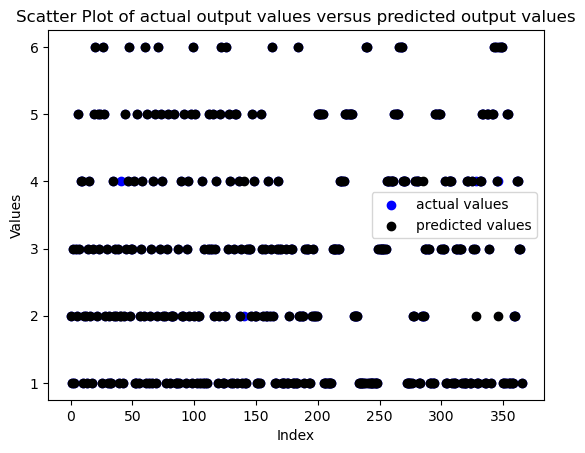

The model score is:  0.9863387978142076


In [5]:
# setting up logistic regression

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(Input_Matrix ,Output_Matrix )
Y_predicted = model.predict(Input_Matrix )
model_score = model.score(Input_Matrix ,Output_Matrix )

plt.scatter(np.arange(len(Output_Matrix)), Output_Matrix, marker='o', color='b', label='actual values')
plt.scatter(np.arange(len(Y_predicted)), Y_predicted, marker='o', color='k', label='predicted values')
plt.title('Scatter Plot of actual output values versus predicted output values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

print ( "The model score is: ",model_score)


In [ ]:
# bootstrapping logistic regression 

n_bootstraps = 1000

# List to store coefficients for each bootstrap sample
bootstrap_coefficients = []

# Bootstrap loop
for _ in range(n_bootstraps):
    # Resample with replacement
    Input_Matrix_resampled, Output_Matrix_resampled = resample(Input_Matrix, Output_Matrix)
    
    # Fit logistic regression model
    model = LogisticRegression()
    model.fit(Input_Matrix_resampled, Output_Matrix_resampled)
    
    # Store coefficients
    bootstrap_coefficients.append(model.coef_)

# Convert list of coefficients to numpy array
bootstrap_coefficients = np.array(bootstrap_coefficients)

# Calculate means and standard deviations of coefficients
coefficients_mean = np.mean(bootstrap_coefficients, axis=0)
coefficients_std = np.std(bootstrap_coefficients, axis=0)

plt.figure(figsize=(10, 6))
for i in range(bootstrap_coefficients.shape[1]):
    plt.subplot(1, bootstrap_coefficients.shape[1], i + 1)
    plt.hist(bootstrap_coefficients[:, i], bins=30, alpha=0.7)
    plt.title(f'Coefficient {i + 1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sophi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
# cross validating logistic regression 

model = LogisticRegression(solver='liblinear', random_state=0)
Y_predicted = cross_val_predict(model, Input_Matrix, Output_Matrix, cv=5)

accuracy = accuracy_score(Output_Matrix,Y_predicted )

print(f" Accuracy: {accuracy}")

PLSR

In [ ]:
# variance explained by each component

R2Y = []
n_array = []
for n in range (1,30):
    PLSR = PLSRegression(n)
    PLSR.fit(Input_Matrix ,Output_Matrix)
    R2Y.append (PLSR.score(Input_Matrix ,Output_Matrix))
    n_array.append(n)

plt.scatter(n_array,R2Y, color = "purple", label = "R2Y" )
plt.legend()


plt.title ("Variance explained in the data by different numbers of principal components")
plt.xlabel ("Number of components")
plt.ylabel ("Variance explained")

plt.show()

PLSR with 1 PC

In [ ]:
# setting up PLSR with 1 PC

PLSR = PLSRegression(1)
PLSR.fit(Input_Matrix ,Output_Matrix)
predictions = PLSR.predict(Input_Matrix)
r2 = r2_score(Output_Matrix, predictions)

plt.scatter( Output_Matrix, predictions,color = "blue" )
x_values = np.linspace(0, 10, 100)
y_values = x_values  # y = x for every x value
plt.plot(x_values, y_values, color='black',linestyle='--')
plt.title ("1 principal component model prediction versus actual diagnosis")
plt.xlabel ("actual diagnosis")
plt.ylabel ("Predicted diagnosis")
print (" the model fitness is",r2)
plt.show()

In [ ]:
# bootstrapping PLSR with 1 PC

n_bootstraps = 1000
bootstrap_models = []

for _ in range(n_bootstraps):
    # Resample input and output matrices
    Input_Matrix_resampled, Output_Matrix_resampled = resample(Input_Matrix, Output_Matrix, replace=True)
    
    # Fit PLSR model
    plsr = PLSRegression(n_components=1)
    plsr.fit(Input_Matrix_resampled, Output_Matrix_resampled)
    bootstrap_models.append(plsr)

# Make predictions
predictions = np.zeros_like(Output_Matrix, dtype=float)  # Ensure predictions are of float type
for model in bootstrap_models:
    pred = model.predict(Input_Matrix)
    predictions += pred.flatten()  # Flatten the prediction to match the shape of predictions

# Aggregate results
predictions /= n_bootstraps

# Assess model performance
mse = mean_squared_error(Output_Matrix, predictions)
print("Mean Squared Error:", mse)

# Calculate confidence intervals
lower_bound = np.percentile(predictions, 2.5, axis=0)
upper_bound = np.percentile(predictions, 97.5, axis=0)
errors = np.abs(np.vstack((predictions - lower_bound, upper_bound - predictions)))

Output_Matrix = np.array(Output_Matrix)

# Scatter plot with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(Output_Matrix, predictions, yerr=errors, fmt='o', color='blue', alpha=0.5)
plt.plot([Output_Matrix.min(), Output_Matrix.max()], [Output_Matrix.min(), Output_Matrix.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('PLSR Model with 1 Principal Component - Bootstrap Predictions with Confidence Intervals')
plt.grid(True)
plt.show()

In [ ]:
# cross validating PLSR with 1 PC

PLSR = PLSRegression(n_components=1)
LOO_CV = LeaveOneOut()
CV = cross_val_predict(PLSR, Input_Matrix, Output_Matrix, cv=LOO_CV)
r2 = r2_score(Output_Matrix, CV)
print("R-squared score:", r2)

plt.scatter( Output_Matrix, CV,color = "blue" )
x_values = np.linspace(0, 10, 100)
y_values = x_values  # y = x for every x value
plt.plot(x_values, y_values, color='black',linestyle='--')
plt.title ("1 principal component model with CV: prediction versus actual values")
plt.xlabel ("Observed valued")
plt.ylabel ("Cross validated predicted value")
plt.show()

PLSR with 3 Principle Components

In [ ]:
# setting up PLSR with 3 PCs

PLSR = PLSRegression(3)
PLSR.fit(Input_Matrix ,Output_Matrix)
predictions = PLSR.predict(Input_Matrix)
r2 = r2_score(Output_Matrix, predictions)

plt.scatter( Output_Matrix, predictions,color = "blue" )
x_values = np.linspace(0, 10, 100)
y_values = x_values  # y = x for every x value
plt.plot(x_values, y_values, color='black',linestyle='--')
plt.title ("3 principal component model prediction versus actual diagnosis")
plt.xlabel ("actual diagnosis")
plt.ylabel ("Predicted diagnosis")
print (" the model fitness is",r2)
plt.show()

In [ ]:
# PLSR_3PC scores graph

PLSR_3 = PLSRegression(3)
PLSR_3.fit(Input_Matrix ,Output_Matrix)

PC1_scores = PLSR_3.x_scores_[:,0]
PC3_scores = PLSR_3.x_scores_[:,2]

plt.scatter(PC1_scores,PC3_scores, edgecolor ="k")
plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1, 0, 1,2,3,4,5,6,7,8,])
plt.yticks([-8,-7,-6,-5,-4,-3,-2,-1, 0, 1,2,3,4,5,6,7,8,])
plt.axhline(y= 0, color='black', linestyle='--')
plt.axvline(x= 0, color='black', linestyle='--')
plt.title ("PLSR 3PCs Scores plot")
plt.xlabel ("PC1")
plt.ylabel ("PC3")
plt.show()

In [ ]:
# PLSR_3PC loadings graph

PLSR_3 = PLSRegression(3)
PLSR_3.fit(Input_Matrix ,Output_Matrix)

Loadings_X = PLSR_3.x_loadings_
Loadings_Y = PLSR_3.y_loadings_
X_PC1 = Loadings_X [:,0]
X_PC3 = Loadings_X [:,2]
Y_PC1 = Loadings_Y [:,0]
Y_PC3 = Loadings_Y [:,2]

for i in range (len(variables)-2):
    plt.scatter(X_PC1[i], X_PC3[i], color="black")
    plt.annotate(variables[i], (X_PC1[i], X_PC3[i]), textcoords="offset points", xytext=(5,5), ha='center',fontsize=5)
    
plt.scatter(Y_PC1,Y_PC3, label = "output", color = "pink", marker='D')
plt.legend()

plt.xticks([-.3,-.2,-.1, 0,.1,.2,.3])
plt.yticks([-.3,-.2,-.1, 0,.1,.2,.3])
plt.axhline(y= 0, color='black', linestyle='--')
plt.axvline(x= 0, color='black', linestyle='--')
plt.title ("PLSR 3PCs Loadings plot")
plt.xlabel ("PC1")
plt.ylabel ("PC3")
plt.show()

In [ ]:
# Bootstrapping PLSR_PC3

num_iterations = 500

# Initialize arrays to store bootstrapped loadings
PC1_Input_bootstrapped = np.zeros((num_iterations, Input_Matrix.shape[1]))
PC3_Input_bootstrapped = np.zeros((num_iterations, Input_Matrix.shape[1]))
PC1_Output_bootstrapped = np.zeros(num_iterations)
PC3_Output_bootstrapped = np.zeros(num_iterations)

for i in range(num_iterations):
    # Resample the data
    resampled_indices = resample(range(len(Input_Matrix)))
    resampled_indices = np.array(resampled_indices).astype(int)
    Input_Matrix_resampled = np.array(Input_Matrix)[resampled_indices]
    Output_Matrix_resampled = np.array(Output_Matrix)[resampled_indices]

    # Fit PLSR with 3 components
    PLSR_3 = PLSRegression(3)
    PLSR_3.fit(Input_Matrix_resampled , Output_Matrix_resampled)

    # Store loadings for X and Y
    PC1_Input_bootstrapped[i] = PLSR_3.x_loadings_[:, 0]
    PC3_Input_bootstrapped[i] = PLSR_3.x_loadings_[:, 2]
    PC1_Output_bootstrapped[i] = PLSR_3.y_loadings_[:, 0]
    PC3_Output_bootstrapped[i] = PLSR_3.y_loadings_[:, 2]

# Calculate medians and interquartile ranges
PC1_X_bootstrapped_median = np.median(PC1_Input_bootstrapped, axis=0)
PC1_X_bootstrapped_iqr = np.percentile(PC1_Input_bootstrapped, 75, axis=0) - np.percentile(PC1_Input_bootstrapped, 25, axis=0)
PC3_X_bootstrapped_median = np.median(PC3_Input_bootstrapped, axis=0)
PC3_X_bootstrapped_iqr = np.percentile(PC3_Input_bootstrapped, 75, axis=0) - np.percentile(PC3_Input_bootstrapped, 25, axis=0)

PC1_Y_bootstrapped_median = np.median( PC1_Output_bootstrapped)
PC1_Y_bootstrapped_iqr = np.percentile( PC1_Output_bootstrapped, 75) - np.percentile( PC1_Output_bootstrapped, 25)
PC3_Y_bootstrapped_median = np.median( PC3_Output_bootstrapped)
PC3_Y_bootstrapped_iqr = np.percentile( PC3_Output_bootstrapped, 75) - np.percentile( PC3_Output_bootstrapped, 25)

# Plotting
plt.scatter(PC1_X_bootstrapped_median, PC3_X_bootstrapped_median, label="Input", color="grey")
plt.errorbar(PC1_X_bootstrapped_median, PC3_X_bootstrapped_median,
             xerr=PC1_X_bootstrapped_iqr, yerr=PC3_X_bootstrapped_iqr,
             fmt='.', label='Input with Error Bars')
plt.scatter(PC1_Y_bootstrapped_median, PC3_Y_bootstrapped_median, label="Output", color="blue", marker='D')
plt.errorbar(PC1_Y_bootstrapped_median, PC3_Y_bootstrapped_median,
             xerr=PC1_Y_bootstrapped_iqr, yerr=PC3_Y_bootstrapped_iqr,
             fmt='.', label='Output with Error Bars')

# Customize the plot
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Bootstrapped 3 PCs PLSR Loadings plot with error bars")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()


In [ ]:
# Cross validating PLSR_PC3

PLSR = PLSRegression(n_components=3)
LOO_CV = LeaveOneOut()
CV = cross_val_predict(PLSR, Input_Matrix, Output_Matrix, cv=LOO_CV)
r2 = r2_score(Output_Matrix, CV)
print("R-squared score:", r2)

plt.scatter( Output_Matrix, CV,color = "blue" )
x_values = np.linspace(0, 10, 100)
y_values = x_values  # y = x for every x value
plt.plot(x_values, y_values, color='black',linestyle='--')
plt.title ("3 principal component model cross validated prediction versus observed ")
plt.xlabel ("Observed valued")
plt.ylabel ("Cross validated predicted value")
plt.show()

PLSR with 5 Principle Components

In [ ]:
# setting up PLSR with 5 PCs

PLSR = PLSRegression(5)
PLSR.fit(Input_Matrix ,Output_Matrix)
predictions = PLSR.predict(Input_Matrix)
r2 = r2_score(Output_Matrix, predictions)

plt.scatter( Output_Matrix, predictions,color = "blue" )
x_values = np.linspace(0, 10, 100)
y_values = x_values  # y = x for every x value
plt.plot(x_values, y_values, color='black',linestyle='--')
plt.title ("5 principal component model prediction versus actual diagnosis")
plt.xlabel ("actual diagnosis")
plt.ylabel ("Predicted diagnosis")
print (" the model fitness is",r2)
plt.show()

In [ ]:
# PLSR_5PC scores graph

PLSR_5 = PLSRegression(5)
PLSR_5.fit(Input_Matrix ,Output_Matrix)

PC1_scores = PLSR_5.x_scores_[:,0]
PC2_scores = PLSR_5.x_scores_[:,4]

plt.scatter(PC1_scores,PC2_scores, edgecolor ="k")
plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1, 0, 1,2,3,4,5,6,7,8,])
plt.yticks([-8,-7,-6,-5,-4,-3,-2,-1, 0, 1,2,3,4,5,6,7,8,])
plt.axhline(y= 0, color='black', linestyle='--')
plt.axvline(x= 0, color='black', linestyle='--')
plt.title ("PLSR 5PCs Scores plot")
plt.xlabel ("PC1")
plt.ylabel ("PC5")
plt.show()

In [ ]:
 #PLSR_5PC loadings graph
    
PLSR_5 = PLSRegression(5)
PLSR_5.fit(Input_Matrix ,Output_Matrix)

Loadings_X = PLSR_5.x_loadings_
Loadings_Y = PLSR_5.y_loadings_
X_PC1 = Loadings_X [:,0]
X_PC5 = Loadings_X [:,4]
Y_PC1 = Loadings_Y [:,0]
Y_PC5 = Loadings_Y [:,4]

for i in range (len(variables)-2):
    plt.scatter(X_PC1[i], X_PC5[i], color="black")
    plt.annotate(variables[i], (X_PC1[i], X_PC5[i]), textcoords="offset points", xytext=(5,5), ha='center',fontsize=5)
    
plt.scatter(Y_PC1,Y_PC5, label = "output", color = "pink", marker='D')
plt.legend()

plt.xticks([-.3,-.2,-.1, 0,.1,.2,.3])
plt.yticks([-.3,-.2,-.1, 0,.1,.2,.3])
plt.axhline(y= 0, color='black', linestyle='--')
plt.axvline(x= 0, color='black', linestyle='--')
plt.title ("PLSR 5PCs Loadings plot")
plt.xlabel ("PC1")
plt.ylabel ("PC5")
plt.show()

In [ ]:
# Bootstrapping PLSR_PC5

num_iterations = 500

# Initialize arrays to store bootstrapped loadings
PC1_Input_bootstrapped = np.zeros((num_iterations, Input_Matrix.shape[1]))
PC5_Input_bootstrapped = np.zeros((num_iterations, Input_Matrix.shape[1]))
PC1_Output_bootstrapped = np.zeros(num_iterations)
PC5_Output_bootstrapped = np.zeros(num_iterations)

for i in range(num_iterations):
    # Resample the data
    resampled_indices = resample(range(len(Input_Matrix)))
    resampled_indices = np.array(resampled_indices).astype(int)
    Input_Matrix_resampled = np.array(Input_Matrix)[resampled_indices]
    Output_Matrix_resampled = np.array(Output_Matrix)[resampled_indices]

    # Fit PLSR with 2 components
    PLSR_5 = PLSRegression(5)
    PLSR_5.fit(Input_Matrix_resampled , Output_Matrix_resampled)

    # Store loadings for X and Y
    PC1_Input_bootstrapped[i] = PLSR_5.x_loadings_[:, 0]
    PC5_Input_bootstrapped[i] = PLSR_5.x_loadings_[:, 4]
    PC1_Output_bootstrapped[i] = PLSR_5.y_loadings_[:, 0]
    PC5_Output_bootstrapped[i] = PLSR_5.y_loadings_[:, 4]

# Calculate medians and interquartile ranges
PC1_X_bootstrapped_median = np.median(PC1_Input_bootstrapped, axis=0)
PC1_X_bootstrapped_iqr = np.percentile(PC1_Input_bootstrapped, 75, axis=0) - np.percentile(PC1_Input_bootstrapped, 25, axis=0)
PC5_X_bootstrapped_median = np.median(PC5_Input_bootstrapped, axis=0)
PC5_X_bootstrapped_iqr = np.percentile(PC5_Input_bootstrapped, 75, axis=0) - np.percentile(PC5_Input_bootstrapped, 25, axis=0)

PC1_Y_bootstrapped_median = np.median( PC1_Output_bootstrapped)
PC1_Y_bootstrapped_iqr = np.percentile( PC1_Output_bootstrapped, 75) - np.percentile( PC1_Output_bootstrapped, 25)
PC5_Y_bootstrapped_median = np.median( PC5_Output_bootstrapped)
PC5_Y_bootstrapped_iqr = np.percentile( PC5_Output_bootstrapped, 75) - np.percentile( PC5_Output_bootstrapped, 25)

# Plotting
plt.scatter(PC1_X_bootstrapped_median, PC5_X_bootstrapped_median, label="Input", color="grey")
plt.errorbar(PC1_X_bootstrapped_median, PC5_X_bootstrapped_median,
             xerr=PC1_X_bootstrapped_iqr, yerr=PC5_X_bootstrapped_iqr,
             fmt='.', label='Input with Error Bars')
plt.scatter(PC1_Y_bootstrapped_median, PC5_Y_bootstrapped_median, label="Output", color="blue", marker='D')
plt.errorbar(PC1_Y_bootstrapped_median, PC5_Y_bootstrapped_median,
             xerr=PC1_Y_bootstrapped_iqr, yerr=PC5_Y_bootstrapped_iqr,
             fmt='.', label='Output with Error Bars')

# Customize the plot
plt.legend()
plt.xticks([-.5,-.4,-.3, -.2, -.1, 0, .1, .2, .3, .4,.5])
plt.yticks([-.5,-.4,-.3, -.2, -.1, 0, .1, .2, .3, .4,.5])
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Bootstrapped 5 PCs PLSR Loadings plot with error bars")
plt.xlabel("PC1")
plt.ylabel("PC5")
plt.show()


In [ ]:
# Cross validating PLSR_PC5

PLSR = PLSRegression(n_components=5)
LOO_CV = LeaveOneOut()
CV = cross_val_predict(PLSR, Input_Matrix, Output_Matrix, cv=LOO_CV)
r2 = r2_score(Output_Matrix, CV)
print("R-squared score:", r2)

plt.scatter( Output_Matrix, CV,color = "blue" )
x_values = np.linspace(0, 10, 100)
y_values = x_values  # y = x for every x value
plt.plot(x_values, y_values, color='black',linestyle='--')
plt.title ("5 principal component model cross validated prediction versus observed ")
plt.xlabel ("Observed valued")
plt.ylabel ("Cross validated predicted value")
plt.show()

PLSR with 10 Principle Components

In [ ]:
# setting up PLSR with 10 PCs

PLSR = PLSRegression(10)
PLSR.fit(Input_Matrix ,Output_Matrix)
predictions = PLSR.predict(Input_Matrix)
r2 = r2_score(Output_Matrix, predictions)

plt.scatter( Output_Matrix, predictions,color = "blue" )
x_values = np.linspace(0, 10, 100)
y_values = x_values  # y = x for every x value
plt.plot(x_values, y_values, color='black',linestyle='--')
plt.title ("10 principal components model prediction versus actual diagnosis")
plt.xlabel ("actual diagnosis")
plt.ylabel ("Predicted diagnosis")
print (" the model fitness is",r2)
plt.show()

In [ ]:
# PLSR_10PC scores graph

PLSR_10 = PLSRegression(10)
PLSR_10.fit(Input_Matrix ,Output_Matrix)

PC1_scores = PLSR_10.x_scores_[:,0]
PC10_scores = PLSR_10.x_scores_[:,9]

plt.scatter(PC1_scores,PC10_scores, edgecolor ="k")
plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1, 0, 1,2,3,4,5,6,7,8,])
plt.yticks([-8,-7,-6,-5,-4,-3,-2,-1, 0, 1,2,3,4,5,6,7,8,])
plt.axhline(y= 0, color='black', linestyle='--')
plt.axvline(x= 0, color='black', linestyle='--')
plt.title ("PLSR 10 PCs Scores plot")
plt.xlabel ("PC1")
plt.ylabel ("PC10")
plt.show()

In [ ]:
 #PLSR_10PC loadings graph
    
PLSR_10 = PLSRegression(10)
PLSR_10.fit(Input_Matrix ,Output_Matrix)

Loadings_X = PLSR_10.x_loadings_
Loadings_Y = PLSR_10.y_loadings_
X_PC1 = Loadings_X [:,0]
X_PC10 = Loadings_X [:,9]
Y_PC1 = Loadings_Y [:,0]
Y_PC10 = Loadings_Y [:,9]


for i in range (len(variables)-2):
    plt.scatter(X_PC1[i], X_PC10[i], color="black")
    plt.annotate(variables[i], (X_PC1[i], X_PC10[i]), textcoords="offset points", xytext=(5,5), ha='center',fontsize=5)

plt.scatter(Y_PC1,Y_PC10, label = "output", color = "pink", marker='D')
plt.legend()


plt.axhline(y= 0, color='black', linestyle='--')
plt.axvline(x= 0, color='black', linestyle='--')
plt.title ("PLSR 10 PCs Loadings plot")
plt.xlabel ("PC1")
plt.ylabel ("PC10")
plt.show()

In [ ]:
# Bootstrapping PLSR_PC10

num_iterations = 500

# Initialize arrays to store bootstrapped loadings
PC1_Input_bootstrapped = np.zeros((num_iterations, Input_Matrix.shape[1]))
PC10_Input_bootstrapped = np.zeros((num_iterations, Input_Matrix.shape[1]))
PC1_Output_bootstrapped = np.zeros(num_iterations)
PC10_Output_bootstrapped = np.zeros(num_iterations)

for i in range(num_iterations):
    # Resample the data
    resampled_indices = resample(range(len(Input_Matrix)))
    resampled_indices = np.array(resampled_indices).astype(int)
    Input_Matrix_resampled = np.array(Input_Matrix)[resampled_indices]
    Output_Matrix_resampled = np.array(Output_Matrix)[resampled_indices]

    # Fit PLSR with 10 components
    PLSR_10 = PLSRegression(10)
    PLSR_10.fit(Input_Matrix_resampled , Output_Matrix_resampled)

    # Store loadings for X and Y
    PC1_Input_bootstrapped[i] = PLSR_10.x_loadings_[:, 0]
    PC10_Input_bootstrapped[i] = PLSR_10.x_loadings_[:, 9]
    PC1_Output_bootstrapped[i] = PLSR_10.y_loadings_[:, 0]
    PC10_Output_bootstrapped[i] = PLSR_10.y_loadings_[:, 9]

# Calculate medians and interquartile ranges
PC1_X_bootstrapped_median = np.median(PC1_Input_bootstrapped, axis=0)
PC1_X_bootstrapped_iqr = np.percentile(PC1_Input_bootstrapped, 75, axis=0) - np.percentile(PC1_Input_bootstrapped, 25, axis=0)
PC10_X_bootstrapped_median = np.median(PC10_Input_bootstrapped, axis=0)
PC10_X_bootstrapped_iqr = np.percentile(PC10_Input_bootstrapped, 75, axis=0) - np.percentile(PC10_Input_bootstrapped, 25, axis=0)

PC1_Y_bootstrapped_median = np.median( PC1_Output_bootstrapped)
PC1_Y_bootstrapped_iqr = np.percentile( PC1_Output_bootstrapped, 75) - np.percentile( PC1_Output_bootstrapped, 25)
PC10_Y_bootstrapped_median = np.median( PC10_Output_bootstrapped)
PC10_Y_bootstrapped_iqr = np.percentile( PC10_Output_bootstrapped, 75) - np.percentile( PC10_Output_bootstrapped, 25)

# Plotting
plt.scatter(PC1_X_bootstrapped_median, PC10_X_bootstrapped_median, label="Input", color="grey")
plt.errorbar(PC1_X_bootstrapped_median, PC10_X_bootstrapped_median,
             xerr=PC1_X_bootstrapped_iqr, yerr=PC10_X_bootstrapped_iqr,
             fmt='.', label='Input with Error Bars')
plt.scatter(PC1_Y_bootstrapped_median, PC10_Y_bootstrapped_median, label="Output", color="blue", marker='D')
plt.errorbar(PC1_Y_bootstrapped_median, PC10_Y_bootstrapped_median,
             xerr=PC1_Y_bootstrapped_iqr, yerr=PC10_Y_bootstrapped_iqr,
             fmt='.', label='Output with Error Bars')

# Customize the plot
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Bootstrapped 10 PCs PLSR Loadings plot with error bars")
plt.xlabel("PC1")
plt.ylabel("PC10")
plt.show()

In [ ]:
# Cross validating PLSR_PC10

PLSR = PLSRegression(n_components=10)
LOO_CV = LeaveOneOut()
CV = cross_val_predict(PLSR, Input_Matrix, Output_Matrix, cv=LOO_CV)
r2 = r2_score(Output_Matrix, CV)
print("R-squared score:", r2)

plt.scatter( Output_Matrix, CV,color = "blue" )
x_values = np.linspace(0, 10, 100)
y_values = x_values  # y = x for every x value
plt.plot(x_values, y_values, color='black',linestyle='--')
plt.title ("10 principal component model cross validated prediction versus observed")
plt.xlabel ("Observed valued")
plt.ylabel ("Cross validated predicted value")
plt.show()